# Import libraries and load dataset

Import Libraries

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [142]:
Churn = pd.read_csv('D:\\data_science_repo\\Customers_Churn_Prediction\\WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

head() shows the first five rows of each column.

In [143]:
Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


info() shows the information of the dataset

In [144]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


isna() show the number of null values present in the dataset

In [145]:
print(Churn.isna().sum())
print('\n There is not any null value present.')

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 There is not any null value present.


describe() shows the statistical relation of the data

In [146]:
Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


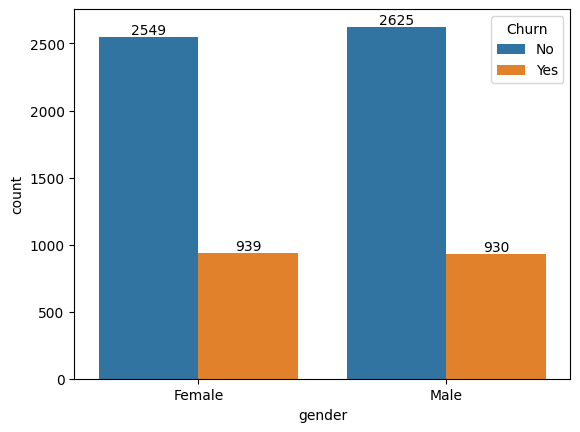

In [147]:
ax = sns.countplot(data=Churn,x='gender', hue='Churn')
for bars in ax.containers:
    ax.bar_label(bars)

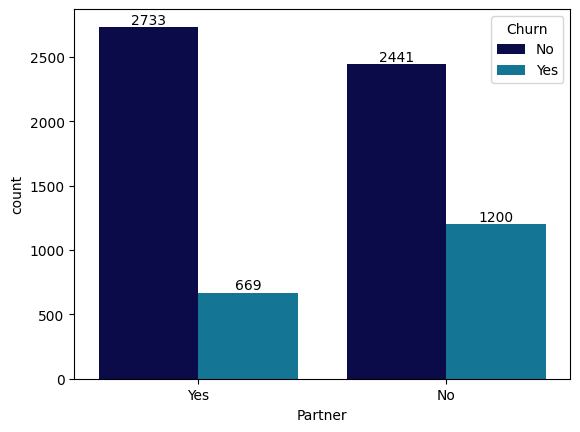

In [148]:
ax = sns.countplot(data=Churn,x='Partner', palette='ocean', hue='Churn')
for bars in ax.containers:
    ax.bar_label(bars)

In [149]:
Churn['gender'] = Churn['gender'].replace({'Male':0,'Female':1})
Churn['Partner'] = Churn['Partner'].replace({'No':0,'Yes':1})
Churn['Dependents'] = Churn['Dependents'].replace({'No':0,'Yes':1})
Churn['PhoneService'] = Churn['PhoneService'].replace({'No':0,'Yes':1})
Churn['MultipleLines'] = Churn['MultipleLines'].replace({'No':0,'Yes':1,'No phone service':2})
Churn['InternetService'] = Churn['InternetService'].replace({'No':0,'Fiber optic':1,'DSL':2})
Churn['OnlineSecurity'] = Churn['OnlineSecurity'].replace({'No':0,'Yes':1,'No internet service':2})
Churn['DeviceProtection'] = Churn['DeviceProtection'].replace({'No':0,'Yes':1,'No internet service':2})
Churn['TechSupport'] = Churn['TechSupport'].replace({'No':0,'Yes':1,'No internet service':2})
Churn['StreamingTV'] = Churn['StreamingTV'].replace({'No':0,'Yes':1,'No internet service':2})
Churn['StreamingMovies'] = Churn['StreamingMovies'].replace({'No':0,'Yes':1,'No internet service':2})
Churn['Contract'] = Churn['Contract'].replace({'Month-to-month':0,'One year':1, 'Two year':2})
Churn['PaperlessBilling'] = Churn['PaperlessBilling'].replace({'Male':0,'Female':1})
Churn['PaymentMethod'] = Churn['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
Churn['OnlineBackup'] = Churn['OnlineBackup'].replace({'No':0,'Yes':1, 'No internet service':2})
Churn['DeviceProtection'] = Churn['DeviceProtection'].replace({'No':0,'Yes':1, 'No internet service':2})
Churn['PaperlessBilling'] = Churn['PaperlessBilling'].replace({'No':0,'Yes':1})

#### Divide data into X and y.

In [151]:
X = Churn[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']]
y = Churn['Churn']

## Import Logistic Regression

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Divide data into training and testing.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
Logistic_Regression = LogisticRegression()

In [155]:
Logistic_Regression.fit(X_train,y_train)

LogisticRegression()

In [156]:
Logistic_regression_pred = Logistic_Regression.predict(X_test)

In [157]:
accuracy_score(y_test, Logistic_regression_pred)

0.8197303051809794

## Support vector Classifier

In [158]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [159]:
accuracy_score(y_test, svc_pred)

0.801277501774308

## K_Neighbos_Classifier

In [160]:
from sklearn.neighbors import KNeighborsClassifier
KNC= KNeighborsClassifier()
KNC.fit(X_train, y_train)
KNC_pred = KNC.predict(X_test)

In [161]:
accuracy_score(y_test, KNC_pred)

0.7714691270404542

## Randon Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)

In [163]:
accuracy_score(y_test, RFC_pred)

0.7920511000709723

## Decision Tree Classifier

In [164]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)

In [165]:
accuracy_score(y_test, DTC_pred)

0.7331440738112136

|Algorithms          |   Accuracy (%)    |
|--------------------|-------------------|
 Logistic Regression | 81 |
 SVC                 | 80
 KNeighborsClassifier| 77
 Random Forest Classifier| 79
 Decision Tree Classifier|73